Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [ ]:
# Choose your target. Which column in your tabular dataset will you predict?:
#       -(COLUMN I CREATE CALLED 'HIGHCOST' which will have 2 different available entries: yes or no)
# Is your problem regression or classification?:
#       -CLASSIFICATION [HighCost])
# How is your target distributed?
# Classification: How many classes? Are the classes imbalanced?:
#       -(TWO; no) cutoff point between low and high cost is $1.41
# Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy 
# if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, 
# in addition to or instead of accuracy?:
#       -
# Choose which observations you will use to train, validate, and test your model:
#       -(AVERAGEPRICE, TOTALVOLUME, TOTALBAGS, TYPE & REGION)
# Are some observations outliers? Will you exclude them?:
#       -THERE ARE OUTLIERS/WILL INCLUDE THEM
# Will you do a random split or a time-based split? 
#       -RANDOM SPLIT
# Begin to clean and explore your data.
# Begin to choose which features, if any, to exclude. Would some features "leak" future information? 
#       -(WILL PROBABLY EXCLUDE THE 'PLU' COLUMNS & SIZE OF BAGS COLUMNS)

In [1]:
import pandas as pd

In [2]:
# Importing dataset about the average price per avocado:
df = pd.read_csv('avocado.csv')

In [3]:
# Examining df:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Getting a sample of the data:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
590,18,2015-08-23,0.85,1120172.03,679440.88,321325.08,8261.74,111144.33,102621.57,8502.23,20.53,conventional,2015,DallasFtWorth
14993,40,2017-03-26,2.02,17307.58,182.23,1192.32,0.00,15933.03,14681.31,1251.72,0.00,organic,2017,Boston
4075,19,2016-08-14,1.17,695230.59,400660.58,142475.60,138.85,151955.56,62925.48,83815.91,5214.17,conventional,2016,MiamiFtLauderdale
13779,26,2016-06-26,1.63,52284.10,5251.61,22040.06,1998.21,22994.22,16106.91,6887.31,0.00,organic,2016,Plains
10025,15,2015-09-13,2.36,2868.18,49.48,2509.01,2.75,306.94,306.94,0.00,0.00,organic,2015,HartfordSpringfield


In [5]:
# Looking at df's shape:
df.shape

(18249, 14)

In [6]:
# Check for NaN/null values:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

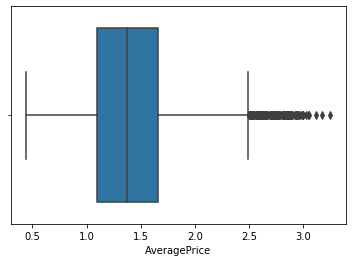

In [7]:
# Looking for outliers:
import seaborn as sns
sns.boxplot(x=df['AveragePrice']);

In [8]:
# Checking spread of values to determine how to
# Make my target column
df['AveragePrice'].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [9]:
# Making target column called 'HighCost',
# Then looking at sample of data:
import numpy as np
df['HighCost'] = np.where(df['AveragePrice'] >= 1.41, 'yes', 'no')
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,HighCost
4646,18,2016-08-21,1.21,1693418.62,748383.14,445643.20,5418.75,493973.53,461318.07,12246.86,20408.6,conventional,2016,Plains,no
13001,28,2016-06-12,1.73,3772.07,2461.73,117.05,9.96,1183.33,1183.33,0.00,0.0,organic,2016,Jacksonville,yes
11954,21,2016-07-31,1.43,1553.42,29.56,204.54,0.00,1319.32,1319.32,0.00,0.0,organic,2016,Albany,yes
11065,15,2015-09-13,1.94,5345.41,28.20,2870.92,683.44,1762.85,1762.85,0.00,0.0,organic,2015,RaleighGreensboro,yes
16085,19,2017-08-20,2.02,138392.00,3383.69,40533.00,660.73,93811.48,84138.69,9672.79,0.0,organic,2017,Midsouth,yes


In [10]:
# Renaming column Unnamed:0 to 'PurchaseInstance':
df = df.rename({'Unnamed: 0': 'PurchaseInstance'}, axis=1)
df.sample(5)

,PurchaseInstance,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,HighCost
10805,15,2015-09-13,1.95,4303.93,312.56,1865.32,48.94,2077.11,2071.25,5.86,0.0,organic,2015,Philadelphia,yes
6703,27,2017-06-25,1.36,180199.86,99600.41,16687.42,75.35,63836.68,33088.12,28278.56,2470.0,conventional,2017,Jacksonville,no
16458,21,2017-08-06,1.78,20197.15,875.54,4130.82,3.69,15187.10,15176.81,10.29,0.0,organic,2017,Philadelphia,yes
14246,25,2016-07-03,1.23,11068.68,908.70,3010.90,683.06,6466.02,4096.13,2369.89,0.0,organic,2016,SouthCarolina,no
2783,27,2015-06-21,0.74,948942.53,601318.24,158997.23,13455.47,175171.59,148132.78,27038.81,0.0,conventional,2015,WestTexNewMexico,no


In [11]:
# Dropping columns for PLU, and bag size:
df = df.drop(columns=['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags'])
df.head()

,PurchaseInstance,Date,AveragePrice,Total Volume,Total Bags,type,year,region,HighCost
0,0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany,no
1,1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany,no
2,2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany,no
3,3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany,no
4,4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany,no


In [12]:
# Converting 'Date' to datetime:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,PurchaseInstance,Date,AveragePrice,Total Volume,Total Bags,type,year,region,HighCost
0,0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany,no
1,1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany,no
2,2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany,no
3,3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany,no
4,4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany,no


In [13]:
# Extracting 'Month' from 'Date', (since time of year may be a determining
# factor when predicting price) then dropping 'Date':
df['MonthRecorded'] = df['Date'].dt.month
df = df.drop(columns='Date')
df.head()

,PurchaseInstance,AveragePrice,Total Volume,Total Bags,type,year,region,HighCost,MonthRecorded
0,0,1.33,64236.62,8696.87,conventional,2015,Albany,no,12
1,1,1.35,54876.98,9505.56,conventional,2015,Albany,no,12
2,2,0.93,118220.22,8145.35,conventional,2015,Albany,no,12
3,3,1.08,78992.15,5811.16,conventional,2015,Albany,no,12
4,4,1.28,51039.60,6183.95,conventional,2015,Albany,no,11


In [14]:
# Determining the majority class:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42)
train.shape, test.shape

((13686, 9), (4563, 9))

In [15]:
target = 'HighCost'
y_train = train[target]
y_train.value_counts(normalize=True)

no     0.532588
yes    0.467412
Name: HighCost, dtype: float64

In [17]:
# Majority Class for every prediction:
majority_class = y_train.mode()[0]
y_pred_train = [majority_class]*len(y_train)

In [18]:
# Getting accuracy score:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.5325880461785767